<a href="https://colab.research.google.com/github/fredyhuancatorres/VA-Tarea-01/blob/main/Copia_de_ProcImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image , ImageEnhance
import matplotlib.pylab as plt
from skimage import io
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display

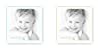

In [ ]:
url = "https://m.media-amazon.com/images/I/416oSxzgpXL._AC_US40_AA50_.jpg"
image = io.imread(url)
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image_2))
cv2_imshow(final_frame)
print('\n')

uint8
499
466
3


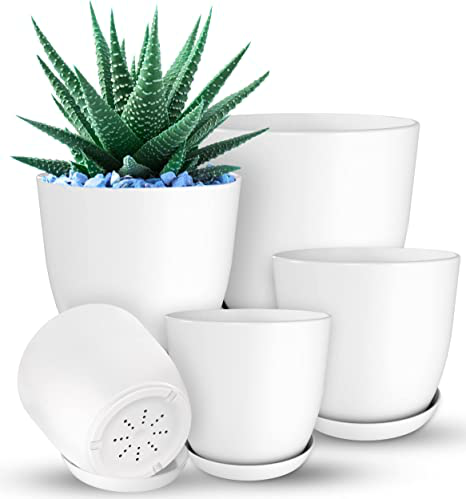



uint8
1200
800
3


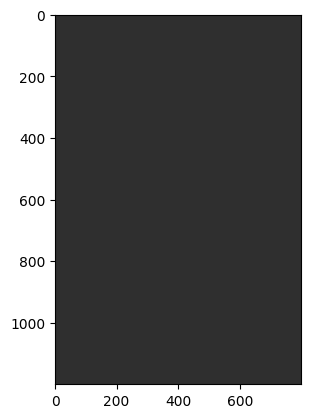

In [ ]:
def bilinear_interpolation(imagen, nuevo_ancho, nuevo_alto):
    alto, ancho, canales = imagen.shape
    arr = np.zeros((nuevo_alto, nuevo_ancho, canales), dtype=np.uint8)

    for y in range(nuevo_alto):
        for x in range(nuevo_ancho):
            coord_x = (x/ancho)*(ancho-1)
            coord_y = (y/alto)*(alto-1)

            x1 = int(coord_x)
            y1 = int(coord_y)
            x2 = x1 + 1
            y2 = y1 + 1

            if x2 >= ancho or y2 >= alto:
                continue  # saltar esta iteración si x2 o y2 están fuera de rango

            valor = np.zeros((1, 1, canales), dtype=np.uint8)

            for c in range(canales):
                if x2-x1 != 0 and y2-y1 != 0:
                    valor[0,0,c] = int(
                        (1/(x2-x1)/(y2-y1)) * (
                            arr[y1,x1,c]*(x2-coord_x)*(y2-coord_y) +
                            arr[y1,x2,c]*(coord_x-x1)*(y2-coord_y) +
                            arr[y2,x1,c]*(x2-coord_x)*(coord_y-y1) +
                            arr[y2,x2,c]*(coord_x-x1)*(coord_y-y1)
                        )
                    )
                else:
                    valor[0,0,c] = 0  # valor predeterminado en caso de división por cero

            arr[y,x,:] = valor

    return Image.fromarray(arr)

def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    """
    Aplica brillo y contraste a una imagen de entrada.
    
    :param input_img: Imagen de entrada en formato de arreglo Numpy.
    :param brightness: Valor de brillo a aplicar (-255 a 255). Valor predeterminado: 0 (sin cambio).
    :param contrast: Valor de contraste a aplicar (-127 a 127). Valor predeterminado: 0 (sin cambio).
    :return: Imagen transformada con el brillo y contraste aplicados.
    """
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            max_val = 255
        else:
            shadow = 0
            max_val = 255 + brightness
        al_pha = (max_val - shadow) / 255
        ga_mma = shadow

        # Aplicar la transformación de brillo
        lut = np.arange(0, 256).astype('float32')
        lut = al_pha * (lut - ga_mma) + ga_mma
        lut = np.clip(lut, 0, 255).astype('uint8')
        input_img = cv.LUT(input_img, lut)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        al_pha = f
        ga_mma = 127 * (1 - f)

        # Aplicar la transformación de contraste
        lut = np.arange(0, 256).astype('float32')
        lut = al_pha * (lut - ga_mma) + ga_mma
        lut = np.clip(lut, 0, 255).astype('uint8')
        input_img = cv.LUT(input_img, lut)

    return input_img



# Ejemplo de uso
url = "https://m.media-amazon.com/images/I/71ISeaGCW1L._AC_SX466_.jpg"
imagen = io.imread(url)
np_imageI = np.asarray(imagen)
 # Check the image matrix data type (could know the bit depth of the image)
print(np_imageI.dtype)
# Check the height of image 
print(np_imageI.shape[0])
# Check the width of image 
print(np_imageI.shape[1])
# Check the number of channels of the image
print(np_imageI.shape[2])
cv2_imshow(imagen)
print('\n')

nueva_imagen = bilinear_interpolation(imagen, 800, 1200)
brillo = ImageEnhance.Brightness(nueva_imagen)
nueva_imagen = brillo.enhance(1.5)

contraste = ImageEnhance.Contrast(nueva_imagen)
nueva_imagen = contraste.enhance(1.25)

np_image = np.asarray(nueva_imagen)
 # Check the image matrix data type (could know the bit depth of the image)
print(np_image.dtype)
# Check the height of image 
print(np_image.shape[0])
# Check the width of image 
print(np_image.shape[1])
# Check the number of channels of the image
print(np_image.shape[2])
np_image = np.array(nueva_imagen)
nueva_imagen = apply_brightness_contrast(np_image, brightness=20, contrast=30)

plt.imshow(nueva_imagen)
plt.show()



print('\n')

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


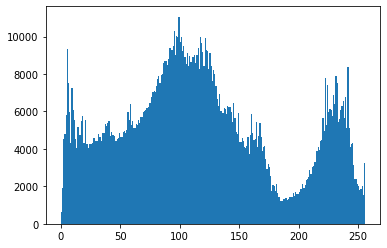

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

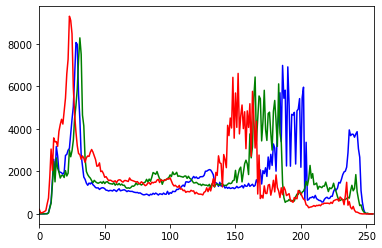

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

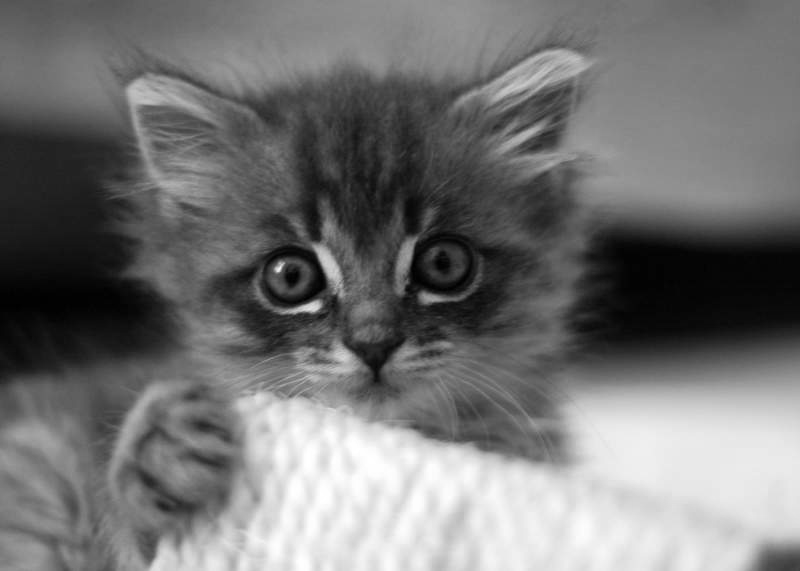

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

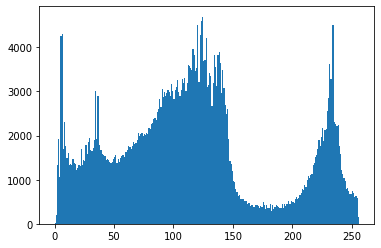

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

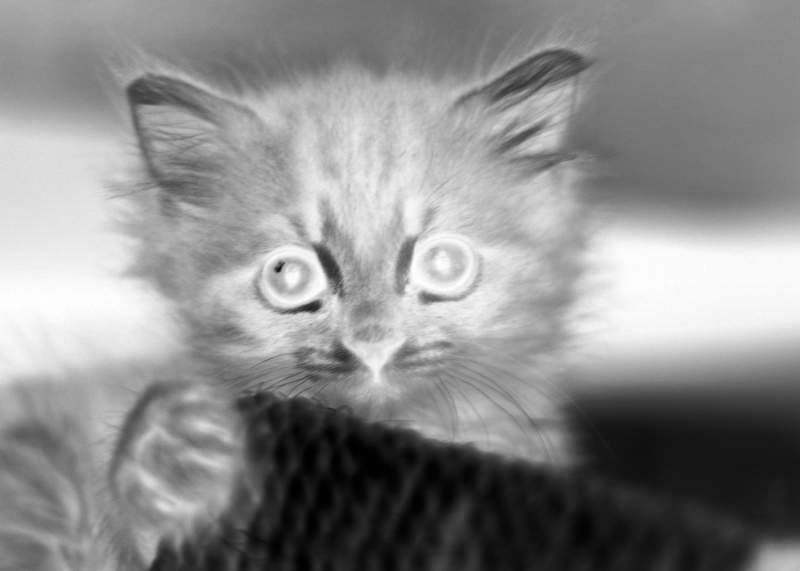

In [ ]:
# The lightness level of the gray_image decreases after this step
#im4 = 255.0*(gray_image/255.0)**2
im4 = 255.0 - gray_image
cv2_imshow(im4)

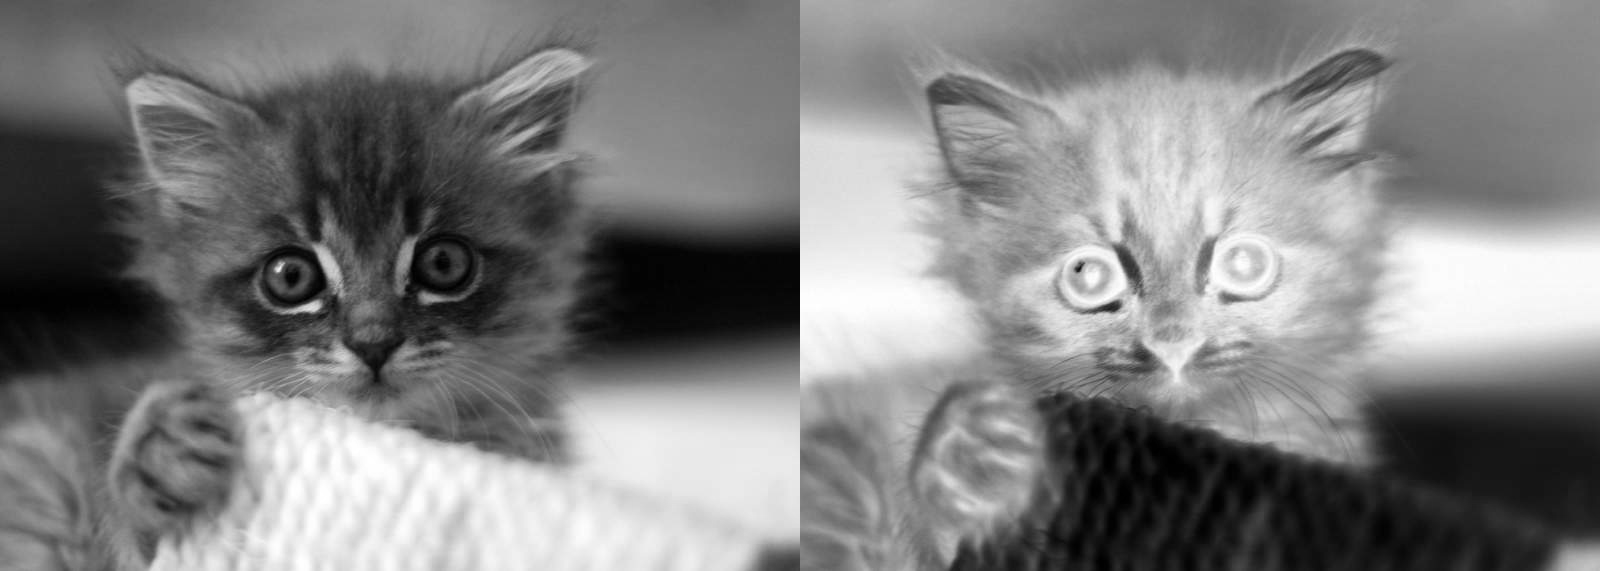

In [ ]:
im4 = np.ma.filled(im4,0).astype('uint8')
final_frame = cv.hconcat((gray_image, im4))
cv2_imshow(final_frame)

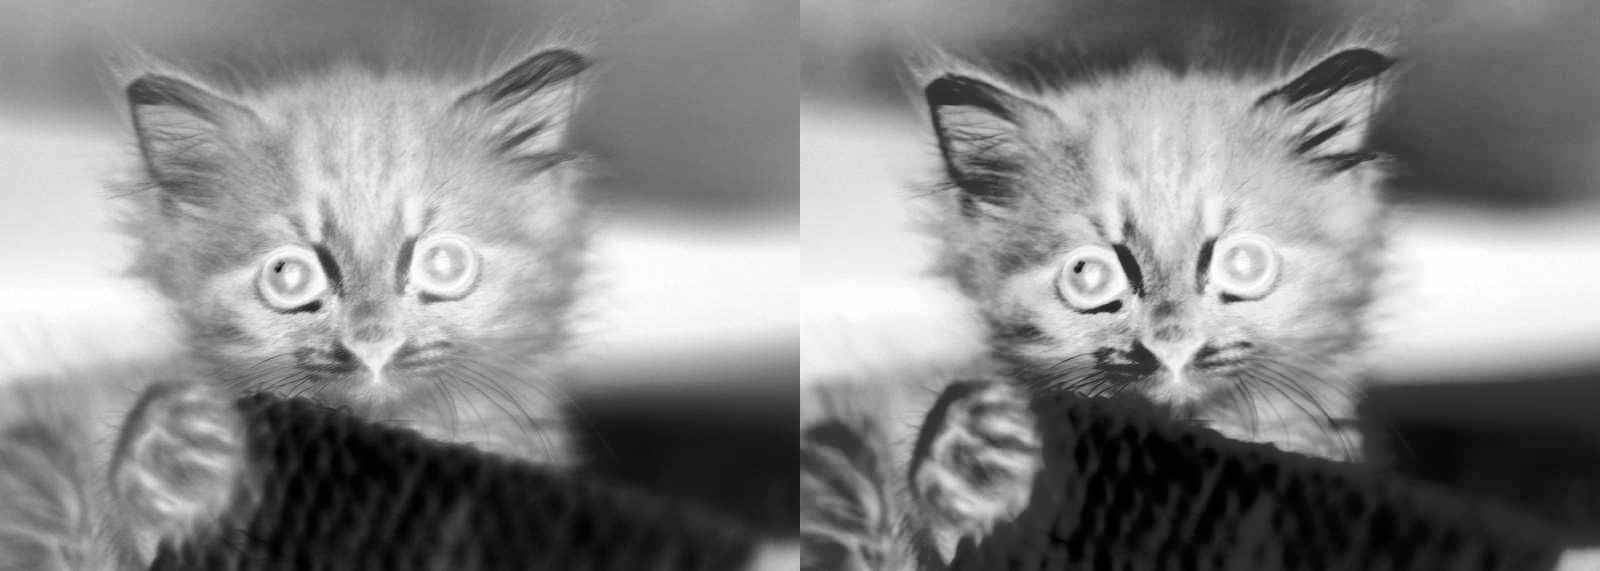

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
im5 = np.ma.filled(im5,0).astype('uint8')
final_frame = cv.hconcat((im4, im5))
cv2_imshow(final_frame)